<a href="https://colab.research.google.com/github/linnea-backgard/ai-ml-principles-exercises/blob/main/ML-training/activeloop-deeplake/Dataset_1_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 397 kB 5.2 MB/s 
     |████████████████████████████████| 132 kB 59.7 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 6.7 MB 57.6 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 10.3 MB 24.7 MB/s 
     |████████████████████████████████| 140 kB 48.7 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 132 kB 43.9 MB/s 
     |████████████████████████████████| 127 kB 45.2 MB/s 
  Created wheel for deeplake: filename=deeplake-3.1.3-py3-none-any.whl size=481651 sha256=e3e3024d103da2be1217bd1f6fdac22314018719e3ab469c8970cd943c7b36d4
  Stored in directory: /root/.cache/pip/wheels/cb/d8/98/05f0668c5e01551cb264c85ff9bf0276a367f8c60d9ddf4fa7
Successfully built deeplake
  Attempting uninstall: urllib3
    F

In [37]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 66.6 MB/s 
     |████████████████████████████████| 168 kB 74.4 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 168 kB 71.7 MB/s 
     |████████████████████████████████| 166 kB 69.3 MB/s 
     |████████████████████████████████| 166 kB 60.1 MB/s 
     |████████████████████████████████| 162 kB 31.0 MB/s 
     |████████████████████████████████| 162 kB 60.1 MB/s 
     |████████████████████████████████| 158 kB 65.5 MB/s 
     |████████████████████████████████| 157 kB 69.8 MB/s 
     |████████████████████████████████| 157 kB 59.6 MB/s 
     |████████████████████████████████| 157 kB 68.4 MB/s 
     |████████████████████████████████| 157 kB 58.1 MB/s 
     |████████████████████████████████| 157 kB 69.6 MB/s 
     |████████████████████████████

In [3]:
import deeplake

In [ ]:
import wandb

In [4]:
import sklearn

In [5]:
ds = deeplake.load("hub://activeloop/cifar100-train")

hub://activeloop/cifar100-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/cifar100-train


In [6]:
len(ds)

50000

In [7]:
labels = ds.labels.numpy()

In [8]:
labels.shape

(50000, 1)

In [9]:
labels[2]

array([0], dtype=uint32)

In [10]:
from PIL import Image

In [11]:
apple = Image.fromarray(ds.images[2].numpy(), "RGB")

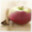

In [12]:
apple

In [13]:
ds_train = deeplake.load('hub://activeloop/cifar100-train')
ds_test = deeplake.load('hub://activeloop/cifar100-test')

hub://activeloop/cifar100-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/cifar100-train
hub://activeloop/cifar100-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/cifar100-test


In [14]:
len(ds_train), len(ds_test)

(50000, 10000)

In [16]:
import numpy as np
# Visa maxvärde 
np.max(ds_test.images)

255

In [17]:
ds_test.images[2].dtype

dtype('uint8')

In [18]:
ds_test.images.shape

(10000, 32, 32, 3)

In [19]:
ds_train.images.numpy().reshape((len(ds_train), -1)).shape

(50000, 3072)

In [51]:
# Laddar ner och flatten images
x_train = ds_train.images.numpy().reshape((len(ds_train), -1))
x_test = ds_test.images.numpy().reshape((len(ds_test), -1))
#y_train = ds_train.labels.numpy().reshape((len(ds_train), -1))
#y_test = ds_test.labels.numpy().reshape((len(ds_test), -1))

In [55]:
y_train = ds_train.labels.numpy().flatten()
y_test = ds_test.labels.numpy().flatten()

In [53]:
x_train.shape

(50000, 3072)

In [54]:
x_test.shape 

(10000, 3072)

In [49]:
y_train.shape

(50000, 1)

In [50]:
y_test.shape

(10000, 1)

In [ ]:
size1 = 100

In [36]:
import numpy as np
train_idx = np.random.choice(len(y_train), replace=False, size= size1)

[72]


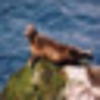

In [34]:
from PIL import Image
print (y_test [2])

Image.fromarray(x_test[2].reshape(32, 32, 3), "RGB").resize((100,100))

In [35]:
from sklearn import svm

In [ ]:
batch_size = 100
epochs = 1

In [68]:
wandb.init(project="dataset 1 CIFAR100", config={"size" : size1})

model = svm.SVC()
model.fit(x_train[train_idx], y_train[train_idx])#, callbacks=[wandb.svc.WandbCallback()])

SyntaxError: ignored

In [57]:
#Predict the first ten samples from the test dataset
model.predict(x_test[0:10])

array([ 8, 34, 88, 34, 71, 88, 97, 31, 71, 34], dtype=uint32)

In [63]:
x_test[0:10].shape

(10, 3072)

In [58]:
# Show the first ten ground truth values from the test dataset
y_test[0:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0], dtype=uint32)

In [64]:
y_test[0:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0], dtype=uint32)

In [66]:
# Compare predicted and true
model.predict(x_test[0:10]) == (y_test[0:10])


array([False, False, False, False,  True, False, False, False, False,
       False])

In [69]:
accuracy = sum(model.predict(x_test) == y_test) / len(y_test)

In [60]:
from sklearn import metrics

predicted = model.predict(x_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.08      0.14      0.10       100
           1       0.09      0.35      0.15       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.01      0.02      0.02       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.04      0.19      0.06       100
           9       0.27      0.06      0.10       100
          10       0.03      0.05      0.04       100
          11       0.03      0.05      0.04       100
          12       0.04      0.06      0.05       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.02      0.14      0.03       100
          16       0.00      0.00      0.00       100
          17       0.14    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


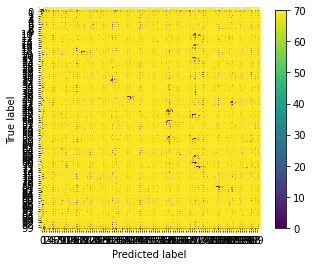

In [67]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)